<a href="https://colab.research.google.com/github/josebogot4/Proyecto1-analisisdatos/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rendimiento de acciones**

## **1. Entendimiendo del negocio**

### **1.1 Objetivos del negocio**
El mercado financiero es un espacio donde se compran y venden activos financieros. Su objetivo es canalizar el ahorro de personas particulares y de otros inversionistas hacia la inversión de las empresas de la forma más eficiente y transparente posible. 

En particular, en los mercados financieros se negocian un tipo de activo de renta variable llamado acciones. Las acciones representan una proporción del capital social de una empresa, en otras palabras son partes iguales en las que se divide una empresa. Estas partes son puestas a la venta y la persona que se hace de ellas es llamado accionista de la empresa. El objetivo de la venta de las acciones es que la empresa recoja cierta liquidez para financiar y desarrollar nuevos proyectos sin necesidad de buscar capital en una entidad bancaria. Por lo cual si la empresa logra desarrollarse con exito, esta se cotizará de manera positiva y su valor en el mercado incrementará, así cada acción también sube de precio y genería ganancias para el accionista.


### **1.2 Objetivo del proyecto** 

El proyecto tiene como objetivo estudiar si existe relación entre los rendimientos de las empresas tecnologicas más importantes del mundo; especificamente hablando de Netflix, Amazon, Apple y Google, comunmente llamadas *AANG*. El objeto de estudio permite plantearse las siguientes preguntas. ¿Es la tasa de retorno positiva como para adquirir alguna de estas acciones?, ¿sería una buena decisión tener alguna de estas acciones en un portafolio de inversiones?, ¿existe alguna relación entre los rendimientos de las acciones mencionadas?. El objetivo principal es resolver estas preguntas.


### **1.3 Planeación del proyecto**

El proyecto se realizará de la siguiente manera:

1. Se descargan los datos (en formato *csv*) necesararios de cada una de las acciones mencionadas en los objetivos. Esto se realiza de manera directa de la página *yahoo-finance*.
2. Una vez descargado los datos, se procede a realizar el entendimiento de los datos, en este caso aparecen los precios de negociación por sesión diaria.
3. Se realiza la limpieza y selección de las características necesarias para resolver las preguntas planteadas.
4. Se analizan los datos para obtener información que permita resolver las preguntas planteadas.
5. Se Establecen visualizaciones de los datos que permitan interpretar la información analizada en el punto anterior, esto con el objetivo de realizar las conclusiones pertinentes.

## **2. Entendimiento de los datos**

In [ ]:
#Importar modulos realizar la manipulación y analísis de los datos

import pandas as pd 
import numpy as np 
from datetime import datetime

from scipy import stats
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib  
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

### **2.1 Analísis exploratorio de los datos**

Los datos se descargan directamente de *yahoo-finance* en formato *csv*.

In [ ]:
# Listar los dataframes de las acciones
# El indice será la fecha. 

google = pd.read_csv('GOOG.csv')
apple = pd.read_csv('AAPL.csv')
amazon = pd.read_csv('AMZN.csv')
netflix = pd.read_csv('NFLX.csv')

Así luce la acción de Google en un dataframe.

In [ ]:
google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
1,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
3,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
4,2004-08-26,2.613952,2.688672,2.606729,2.687676,2.687676,142572401


En los dataframe correpondientes a las acciones vamos a encontrar las siguientes variables. 

| Variable | Definición | valores |
| --- | --- | --- | 
| Date | fecha de la transacción (diaría) | objeto | 
| Open  | Precio de apertura de la acción en la sesión actual | Númerico | 
| High | Máximo valor que toma la acción en la sesión actual | Númerico |
| Low | Mínimo valor que toma la acción en la sesión actual | Númerico |  
| Close | Precio de cierre de la acción (media de los precios de los últimos 10 min de la sesión actual) | Númerico |  
| Adj Close | Precio de cierre de la acción (refleja una situación más real) | Númerico | 
| Volume | Cantidad de transacciones que se hicieron con la acción determinada en la sesión actual| Númerico |

El siguiente dataframe es el reflejo de las operaciones diarias que se han registrado de la acción Netflix desde su lanzamiento en la bolsa

In [ ]:
# Determinar el tipo de dato y las variables del dataframe
# Cabe aclarar que no hay datos faltantes en su estado inicial.
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4676 entries, 0 to 4675
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4676 non-null   object 
 1   Open       4676 non-null   float64
 2   High       4676 non-null   float64
 3   Low        4676 non-null   float64
 4   Close      4676 non-null   float64
 5   Adj Close  4676 non-null   float64
 6   Volume     4676 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 255.8+ KB


El rendimiento de una inversión en diferentes marcos de tiempo es necesario para realizar un analísis aceptable y así poder tomar la decisión correcta. Para calcular el rendimiento definimos la función *marco_tiempo* que tiene como argumentos *data* y *marco_tiempo*, la primera variable toma el dataframe como valor y la segunda el marco de tiempo que se requira (día, mes, año) *'day'*, *'month* o *'year'*.

Observe que los datos descargados tienen como marco de tiempo *día*

Los datos vienen por acción en un documento csv. Para Observar o realizar alguna conclusión superficial nos vamos a fijar en el valor de la variable **Adj Close**.

Considere el siguiente ejemplo donde se toma la acción de google.

In [ ]:
google['Adj Close'].agg(['max', 'min', 'mean'])

max     150.709000
min       2.490913
mean     38.273471
Name: Adj Close, dtype: float64

Text(0.5, 1.0, 'RENDIMIENTO DIARIO - Google')

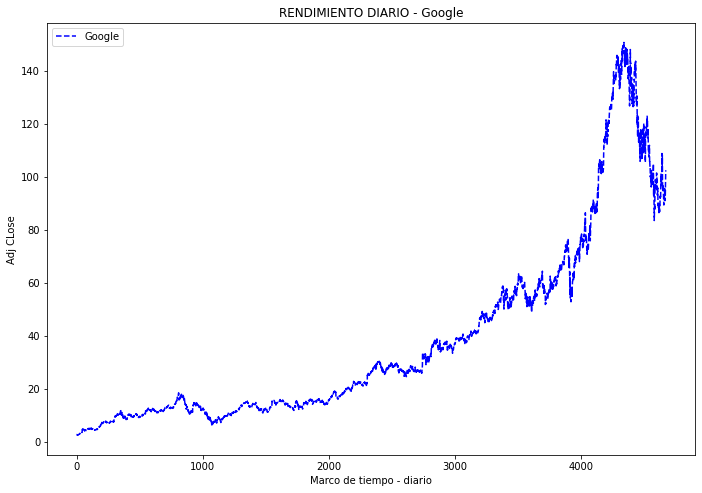

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax = fig.add_axes([0, 0, 1.5, 1.5])

ax.plot(google['Adj Close'], 'b--', label = 'Google')


ax.legend()
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
ax.set_xlabel('Marco de tiempo - diario')
ax.set_ylabel('Adj CLose')
ax.set_title('RENDIMIENTO DIARIO - Google')

Al observar la gráfica vemos el comportamiento de el valor de cierre ajustado (Adj Close) de la acción Google. Se puede observar que no aporta mucho poara tommar una buena decisión acerca de incluirla o no, claramente se ve que ha amentado su valor pero también ha tenido fuertes retrocesos. Para realizar un estudio adecuado vamos a definir algunas funciones que permitan tomar los rendimientos en diferentes marcos de tiempo, y posterior a eso realizar un análisis con algunas herramientas de la estadística descriptiva.

El rendimiento o tasa de retorno (RoR) de una acción es la gananacia o pérdida neta de la inversión realizada durante un determinado periodo de tiempo (marco de tiempo). El rendimiento se peede calcular de la siguiente manera. 

$$RoR = \frac{precio\ actual}{precio\ inicial} -1$$

Es decir,

$$ R_i = \frac{P_i}{P_{i-1}} - 1$$

Existe otro proceso para calcular el rendimiento. Este proceso se conoce como  rentabilidad logarítmica, en términos aplicativos resulta ser más efectivo por eficiencia computacional. La fórmula tiene la siguiente expresión:

$$R_{log} = log\left(\frac{P_i}{P_{i-1}}\right)$$

Nota: El periodo podría ser un día, una semana, un mes, un año o un intervalo de tiempo. El precio actual es el valor Adj Close en la observación actual y el precio inicial será el de la observación anterior.

Antes de continuar, haremos una limpieza de los datos, por ejemplo, eliminar la columna *volume* y modificar el nombre de la variable *Adj Close*.

In [ ]:

def cleandata(data):
    # Colocamos el indice la fecha 
    data = data.set_index('Date')
    # Eliminamos la columna volume
    data = data.drop('Volume', axis = 1)
    # Cambiamos de nombre la columna Adj Close para manipulaciones posteriores
    data = data.rename(columns = {'Adj Close': 'AdjClose'})
    data = data
    return data

google = cleandata(google)
amazon = cleandata(amazon)
apple = cleandata(apple)
netflix = cleandata(netflix)

In [ ]:
# función que retorna los marcos de tiempo (día, mes, año)
def marco_tiempo(data, marcodetiempo):
    data.index = pd.to_datetime(data.index)
    if marcodetiempo == 'day':
        data = data

    elif marcodetiempo == 'month':
        data = data[(data.index.is_month_end)]
    elif marcodetiempo == 'year':
        data = data[data.index.is_year_end]
    
    return data

In [ ]:
# La función **ror** devuelve el dataframe con la columna *Return_ticker* (ticker es la abreviación de la acción en la bolsa de valores)
# ticker debe ser tipo string
def ror(data, ticker):
    data = data.add_suffix('_'+ticker)
    data['Return_'+ticker] = ((data['AdjClose_'+ticker]/data['AdjClose_'+ticker].shift(1)) - 1)
    return data.dropna() 

In [ ]:
# La fución **rorlog** devuelve un dataframe con la columna *Return_ticker* (en este caso se aplica la función R_log definida anteriormente)
def rorlog(data, ticker):
    data = data.add_suffix('_'+ticker)
    data['Return_'+ticker] = np.log(data['AdjClose_'+ticker]/data['AdjClose_'+ticker].shift(1))
    return data.dropna()

A continuación vamos a calcular los rendimientos de las *AANG*, posteriormente se estudiará si existe alguna relación entre los rendimientos correspondientes. 

Hay que tener en cuenta que acciones como *Apple* y *Amazon* iniciaron su participación en los años 80 y 90 respectivamente. En algunos casos será necesario realizar un analísis desde la fecha de participación común de las empresas en el mercado financiero de las acciones.

In [ ]:
# Ejemplo: Apple con marco de tiempo diario (sin el uso de la función **marco_tiempo**)
rorlog(apple, 'aapl').head()

,Open_aapl,High_aapl,Low_aapl,Close_aapl,AdjClose_aapl,Return_aapl
Date,,,,,,
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087582,-0.076225
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089749,0.024441
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092351,0.028580
1980-12-19,0.126116,0.126674,0.126116,0.126116,0.097987,0.059238
1980-12-22,0.132254,0.132813,0.132254,0.132254,0.102756,0.047522


In [ ]:
# Ejemplo: Google con marco de tiempo mensual (uso de la función **marco_tiempo**)
rorlog(marco_tiempo(google, 'month'), 'aapl').head()

,Open_aapl,High_aapl,Low_aapl,Close_aapl,AdjClose_aapl,Return_aapl
Date,,,,,,
2004-09-30,3.235373,3.295149,3.212957,3.227901,3.227901,0.235859
2004-11-30,4.500880,4.557916,4.489423,4.532511,4.532511,0.339444
2004-12-31,4.962151,4.978340,4.796023,4.801752,4.801752,0.057705
2005-01-31,4.824168,4.890669,4.775102,4.872238,4.872238,0.014573
2005-02-28,4.632636,4.729024,4.628900,4.682200,4.682200,-0.039785


In [ ]:
# Ejemplo: Google con marco de tiempo anual (uso de la función **marco_tiempo**)
rorlog(marco_tiempo(google, 'year'), 'goog').head()

,Open_goog,High_goog,Low_goog,Close_goog,AdjClose_goog,Return_goog
Date,,,,,,
2007-12-31,17.399035,17.496668,17.200029,17.222446,17.222446,1.277233
2008-12-31,7.576601,7.745966,7.536999,7.662529,7.662529,-0.809871
2009-12-31,15.560426,15.576615,15.441621,15.441621,15.441621,0.700724
2010-12-31,14.862791,14.904634,14.745480,14.793799,14.793799,-0.042858
2012-12-31,17.434650,17.697914,17.335024,17.618462,17.618462,0.174739


Para analizar los rendimientos de las acciones en un solo dataframe definimos la función *dataconcat* que toma como argumento una lista de las acciones con su respectivo marco de tiempo y las concatena teniendo como referencia las fechas donde se han realizado operaciones comunes.

In [ ]:
def dataconcat(lista):
    data_return = pd.concat(lista, axis = 1).dropna()
    return data_return

In [ ]:
# Se muestran los retornos de Apple, Amazon y Google en marco de tiempo diario.
acciones_dia = [rorlog(marco_tiempo(apple, 'day'), 'aapl')['Return_aapl'], rorlog(marco_tiempo(amazon, 'day'), 'amzn')['Return_amzn'], 
            rorlog(marco_tiempo(google, 'day'), 'goog')['Return_goog'], rorlog(marco_tiempo(netflix, 'day'), 'nflx')['Return_nflx']]
data_0 = dataconcat(acciones_dia)

In [ ]:
# Se muestran los retornos de Apple, Amazon y Google en marco de tiempo mensual.
acciones_mes = [rorlog(marco_tiempo(apple, 'month'), 'aapl')['Return_aapl'], rorlog(marco_tiempo(amazon, 'month'), 'amzn')['Return_amzn'], 
            rorlog(marco_tiempo(google, 'month'), 'goog')['Return_goog'], rorlog(marco_tiempo(netflix, 'month'), 'nflx')['Return_nflx']]
data_1 = dataconcat(acciones_mes)

In [ ]:
# Se muestran los retornos de Apple, Amazon y Google en marco de tiempo anual.
acciones_año = acciones1 = [rorlog(marco_tiempo(apple, 'year'), 'aapl')['Return_aapl'], rorlog(marco_tiempo(amazon, 'year'), 'amzn')['Return_amzn'], 
            rorlog(marco_tiempo(google, 'year'), 'goog')['Return_goog'], rorlog(marco_tiempo(netflix, 'year'), 'nflx')['Return_nflx']]
data_2 = dataconcat(acciones_año)

### **2.2 Analísis con estadística descriptiva** 

En esta sección se realiza un breve analísis de los rendimientos de cada una de las acciones en diferentes marcos de tiempo. En lo que sigue, *analisis_marcotiempo* es el dataframe que nos muestrá la media, la suma de los rendimientos y la desviación estaándar de las acciones que querramos estudiar.

In [ ]:
analisis_dia = dataconcat(acciones_dia).agg(['sum', 'mean', 'max', 'min', 'std'])
analisis_dia

,Return_aapl,Return_amzn,Return_goog,Return_nflx
sum,5.786796,3.871791,3.553574,4.870144
mean,0.001239,0.000829,0.000761,0.001042
max,0.130194,0.238621,0.182251,0.352230
min,-0.197470,-0.246182,-0.123402,-0.526049
std,0.020953,0.024189,0.019304,0.033718


In [ ]:
analisis_mes = dataconcat(acciones_mes).agg(['sum', 'mean', 'max', 'min', 'std'])
analisis_mes

,Return_aapl,Return_amzn,Return_goog,Return_nflx
sum,5.639104,3.900207,3.567165,5.085386
mean,0.035691,0.024685,0.022577,0.032186
max,0.548308,0.449124,0.429206,0.622027
min,-0.380733,-0.363568,-0.209789,-0.729854
std,0.115549,0.120241,0.101357,0.181555


In [ ]:
analisis_año = dataconcat(acciones_año).agg(['sum', 'mean', 'max', 'min', 'std'])
analisis_año

,Return_aapl,Return_amzn,Return_goog,Return_nflx
sum,5.193495,4.321271,3.405540,5.834863
mean,0.432791,0.360106,0.283795,0.486239
max,1.816705,0.964412,1.277233,1.380364
min,-0.841911,-0.591420,-0.809871,-0.640597
std,0.618333,0.462130,0.493799,0.569585


Vamos a visualizar el comportamiento de los rendimientos .

Text(0.5, 1.0, 'RENDIMIENTO ANUAL- AAGN')

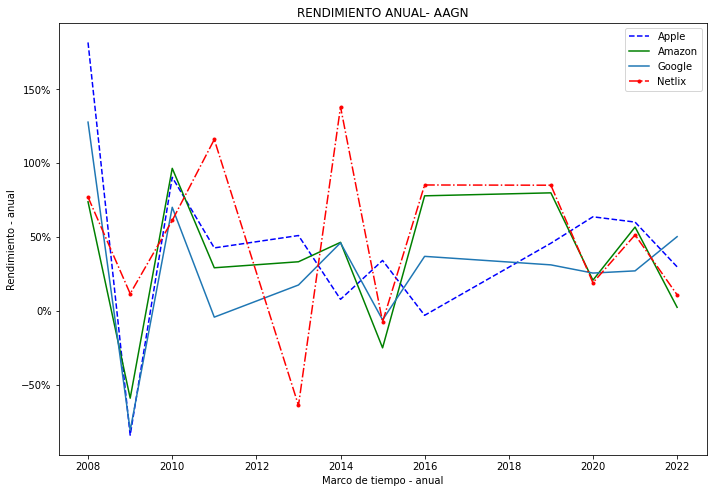

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax = fig.add_axes([0, 0, 1.5, 1.5])

ax.plot(data_2['Return_aapl'], 'b--', label = 'Apple')
ax.plot(data_2['Return_amzn'], 'g', label = 'Amazon')
ax.plot(data_2['Return_goog'], label = 'Google')
ax.plot(data_2['Return_nflx'], 'r.-.', label = 'Netlix')

ax.legend()
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
ax.set_xlabel('Marco de tiempo - anual')
ax.set_ylabel('Rendimiento - anual')
ax.set_title('RENDIMIENTO ANUAL- AAGN')

En la gráfica anterior se visualizar un marco de tiempo anual de los rendimientos de Apple, Amazon, Google, Netflix. La acción Meta (antes facebook) empezo a cotizar en la bolsa desde el 2012.

Para colocar nuestro analísis en un cotexto adecuado se deben tener en cuenta las crisis financieras. En particular la crisis finaciera del 2008 que se origino por una burbuja en el sector inmobiliario en el año 2006, afectando en primera instancia a Estados Unidos y posteriormente al mercado internacional.

En la gráfica anterior se puede apreciar como el precio de las acciones se desplomaban y como consecuencia sus rendimientos eran negativos, provocandole pérdidas a las personas que decidieron invertir a largo plazo entre los años 2006 y 2009. En el año 2009 se puede ver que los rendimientos van en aumento, esto se debe a una recuperación económica. Observe que los rendimientos no tienen un comportamiento lineal, la gráfica sugiere alta oscilación en los retornos (ganancias - perdidas). 



In [ ]:
analisis_año = dataconcat(acciones_año).agg(['sum', 'mean', 'max', 'min', 'std'])
analisis_año

,Return_aapl,Return_amzn,Return_goog,Return_nflx
sum,5.193495,4.321271,3.405540,5.834863
mean,0.432791,0.360106,0.283795,0.486239
max,1.816705,0.964412,1.277233,1.380364
min,-0.841911,-0.591420,-0.809871,-0.640597
std,0.618333,0.462130,0.493799,0.569585


En la información anterior encontramos varios datos interesantes, como por ejemplo que desde el 2008  hasta el 2022 el **rendimiento promedio** es del 43% para la acción de Apple, 36% para Amazon, 28% para Google y 48% para Neflix; una tasa nada despreciable si a ganancia nos referimos. 

También se puede observar el max rendimiento para la acción de Apple es de 180% en un año, así mismo los rendimientos de las otras acciones están rodando esa cifra. Las pérdidas oscilan ente -84% y -60%. 

Realizado este analísis se puede concluir que estas acciones son un buen elemento en un portafolio de inversiones.
Considere lo siguiente: 
1. Invertir en acciones después de una crisis finaciera parece ser una buena estrategia.
2. Las crisis financieras deben verse como una oportunidad de inversión.
3. En la gráfica se puede evidencia que en el 2015 había otra oportunidad de inversión. En la actualidad parece estar mostrando el mismo patrón.
4. Inversiones en corto plazo tienen poco rendimiento.


 Claro está que se deben considerar más aspectos sobre las empresas, por ejemplo, el patrimonio, la deuda, información de quien dirige la empresa, entre otros, estos aspectos no están al alcance de este proyecto.  


Realizar un análisis de los rendimientos en marcos de tiempo pequeños, refiriendonos al diario especificamente puede no ser la opción debido a la alta volatilidad que se pueden observar en la siguiente gráfica.

Text(0.5, 1.0, 'RENDIMIENTO DIARIO- AAGN')

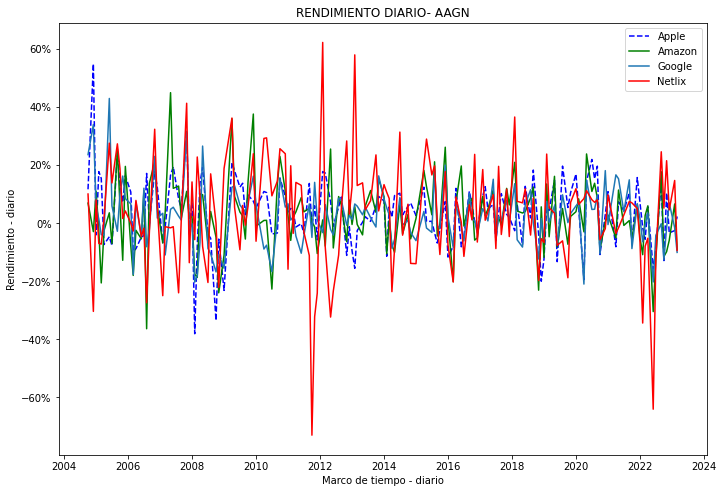

In [ ]:
# Gráfica en marco de tiempo diario

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax = fig.add_axes([0, 0, 1.5, 1.5])

ax.plot(data_1['Return_aapl'], 'b--', label = 'Apple')
ax.plot(data_1['Return_amzn'], 'g', label = 'Amazon')
ax.plot(data_1['Return_goog'], label = 'Google')
ax.plot(data_1['Return_nflx'], 'r', label = 'Netlix')

ax.legend()
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
ax.set_xlabel('Marco de tiempo - diario')
ax.set_ylabel('Rendimiento - diario')
ax.set_title('RENDIMIENTO DIARIO- AAGN')

## **3. Análisis de los datos**

En esta sección veremos si los rendimientos tienen relación alguna calculando el coeficiente de correlación y posteriormente visualizamos en un gráfico.

In [ ]:
def grafi_corr(data, var1, var2, marcodetiempo):
    # la variable marco de tiempo debe ser un objeto tipo str
    cr = data[var1].corr(data[var2]);
    fig, ax = plt.subplots(dpi = 80);
    data.plot.scatter(var1, var2, title = 'Coeficiente de correlación '+marcodetiempo+': {:.2}'.format(cr), ax = ax,
                      marker = 'o', ls = 'None', s = 50, alpha = 0.5, grid = True)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


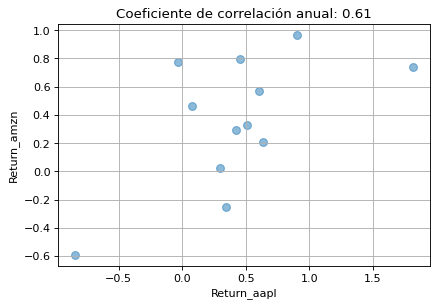

In [ ]:
grafi_corr(data_2, 'Return_aapl', 'Return_amzn', 'anual')

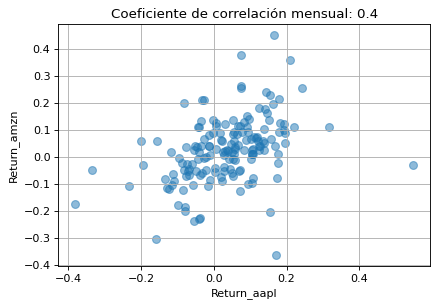

In [ ]:
grafi_corr(data_1, 'Return_aapl', 'Return_amzn', 'mensual')

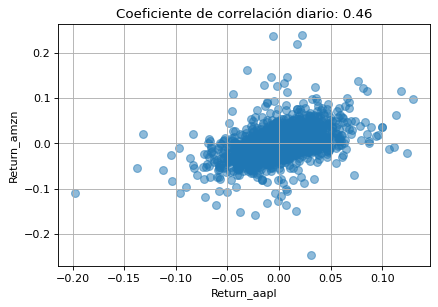

In [ ]:
grafi_corr(data_0, 'Return_aapl', 'Return_amzn', 'diario')

En estos gráficos podemos observar que hay lo que se podría considerar como *valores atipicos* pero estos valores son necesarios para el análsis, ya que son los puntos extremos que ha tomado el precio y pueden dar información útil para tomar decisiones. Por ejemplo, el rendimiento negativo de *Apple* en un año ha sido del -81% apróximadamente. Se podría pensar que a menos que la empresa esté declarandose en banca rota es un buen momento para pensar en comprar acciones de esta empresa. Por tanto no es necesario quitar estos datos.

En los gráficos anteriores podemos observar la relación entre los rendimientos de Apple y Amazon los en los diferentes marcos de tiempo ya mencionados.

Se puede observar la que la relación de los rendimientos es un poco más alta en el marco de tiempo anual. En contraste con las gráficas de los rendimientos que vimos en la sección *2.2*. 

En la siguiente celda podemos observar el análisis de las correlaciones entre los retornos de las acciones estudiadas. Cada marco de datos corresponde a un marco de tiempo (diario, mensual, anual)

In [ ]:
#diario 
data_0.corr()

,Return_aapl,Return_amzn,Return_goog,Return_nflx
Return_aapl,1.000000,0.458703,0.527091,0.285896
Return_amzn,0.458703,1.000000,0.517998,0.383202
Return_goog,0.527091,0.517998,1.000000,0.296508
Return_nflx,0.285896,0.383202,0.296508,1.000000


In [ ]:
#mensual
data_1.corr()

,Return_aapl,Return_amzn,Return_goog,Return_nflx
Return_aapl,1.000000,0.403668,0.537074,0.136609
Return_amzn,0.403668,1.000000,0.508091,0.407024
Return_goog,0.537074,0.508091,1.000000,0.245595
Return_nflx,0.136609,0.407024,0.245595,1.000000


In [ ]:
#anual
data_2.corr()

,Return_aapl,Return_amzn,Return_goog,Return_nflx
Return_aapl,1.000000,0.605828,0.849212,0.103500
Return_amzn,0.605828,1.000000,0.756184,0.499533
Return_goog,0.849212,0.756184,1.000000,0.310139
Return_nflx,0.103500,0.499533,0.310139,1.000000


Note que las correlaciones en el marco anual tienen un aumento para algunas acciones respecto de los otros dos marcos de timpo (diario y mensual).

### **3.1 Pruebas de normalidad y test de hipótsis**

Vamos a implementar una función con el test de Shapiro - Wilk para determinar si los datos siguen una distribución normal.

In [ ]:
def prueba_normalidad(data, ticker):
    test = stats.shapiro(data['Return_'+ticker])
    if test[1] > 0.05:
        print ('Los datos ingresados siguen una distribución normal, p = {} > 0.05'.format(test[1]))
    else:
        print('Los datos ingresados no siguen una distribución normal, p = {} < 0.05'.format(test[1]))

Usaremos el test de normalidad con algunos rendimientos en diferentes marcos de tiempo.

In [ ]:
prueba_normalidad(data_0, 'aapl')

Los datos ingresados no siguen una distribución normal, p = 1.0607654212630825e-38 < 0.05


In [ ]:
prueba_normalidad(data_1, 'aapl')

Los datos ingresados no siguen una distribución normal, p = 0.00043655443005263805 < 0.05


In [ ]:
prueba_normalidad(data_2, 'aapl')

Los datos ingresados siguen una distribución normal, p = 0.2486911118030548 > 0.05


Los tres test realizados anteriormente corresponden a marcos de tiempo día, mes, año respectivamente. Con fines demostrativos, suponga que se requiere saber si las medias de rendimientos de las acciones de Apple y Amazon son iguales 

* Hipótesis nula $H_0: \mu_1 = \mu_2$ 
* Hipótesis alternativa $H_a: \mu_1 \neq \mu_2$ 

In [ ]:
z_score, p_valor = sm.stats.ztest(data_2['Return_aapl'], data_2['Return_amzn'],
                                  value = 0,
                                  alternative = 'two-sided')
print(f"Estadístico: {z_score}\np-valor: {p_valor}")

Estadístico: 0.3261748807084583
p-valor: 0.7442920453195456


Dado que el p_valor no es menor que 0.05 no existe evidencia para estar a favor de la hipótesis alternativa. Es decir no se rechaza la hipótesis nula.

### **3.2 Regresión lineal**

En este apartado aplicaremos una regresión lineal a los datos 'Return_amzn'.

En primer lugar vamos a tomar el conjunto de datos *data_2* para obsevar con que variables tiene cuna correlación mayor.


In [ ]:
data_2.corr()['Return_amzn'].sort_values()

Return_nflx    0.499533
Return_aapl    0.605828
Return_goog    0.756184
Return_amzn    1.000000
Name: Return_amzn, dtype: float64

In [ ]:
data_0.corr()['Return_aapl'].sort_values()

Return_nflx    0.285896
Return_amzn    0.458703
Return_goog    0.527091
Return_aapl    1.000000
Name: Return_aapl, dtype: float64

Note que la acción con la que tiene una mayor correlación es *Google*, vamos a implementar un modelo para realizar una predicción sobre los rendimientos de *Amazon* usando los rendimientos de *Google*.

In [ ]:
def modelo(data, v_dep, v_ind):
    clasificador = 'Return_'+ v_dep + '~' + 'Return_'+ v_ind
    model = sm.OLS.from_formula(clasificador, data = data) 
    result = model.fit()
    print(result.summary())
    return result.params

Usaremos la función modelo para predecir los valores de *Amazon*

In [ ]:
#resultado = modelo(data_2, 'amzn', 'goog')
resultado1 = modelo(data_0, 'aapl', 'goog')

                            OLS Regression Results                            
Dep. Variable:            Return_aapl   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     1797.
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:21:36   Log-Likelihood:                 12191.
No. Observations:                4672   AIC:                        -2.438e+04
Df Residuals:                    4670   BIC:                        -2.437e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0008      0.000      3.081      

In [ ]:
 data_dia = data_0.copy()

<Axes: xlabel='Return_aapl', ylabel='prediccion_aapl'>

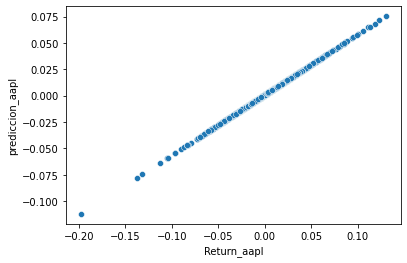

In [ ]:
data_0copy = data_0.copy()
data_dia['prediccion_aapl'] = data_dia['Return_aapl'].apply(lambda x: resultado1[0] + resultado1[1]*x)
sns.scatterplot(data = data_dia, x = 'Return_aapl', y = 'prediccion_aapl' )

In [ ]:
data_dia[['Return_aapl', 'prediccion_aapl']]

,Return_aapl,prediccion_aapl
Date,,
2004-08-23,0.009051,0.005982
2004-08-24,0.027608,0.016599
2004-08-25,0.033849,0.020169
2004-08-26,0.047565,0.028017
2004-08-27,-0.008985,-0.004337
...,...,...
2023-03-08,0.008342,0.005576
2023-03-09,-0.015027,-0.007794
2023-03-10,-0.013976,-0.007193


Observe que $R^2$ tiene el valor 0.572 lo cual sugiere que la predicción es un tanto buena.

In [ ]:
data_2copy = data_2.copy()
data_2copy['predicción_amzn'] = data_2copy['Return_amzn'].apply(lambda x: resultado[0] + resultado[1]*x)

In [ ]:
data_2copy[['Return_amzn', 'predicción_amzn']].head()

In [ ]:
sns.scatterplot(data = data_2copy, x = 'Return_amzn', y = 'predicción_amzn')

## Conclusiones

1. En la sección 2. se puede apreciar que los rendimientos de las acciones se hacen más notorios al largo plazo. En algunos casos superando el 100% de la inversión inicial. En marcos de tiempo de corto plazo los rendimientos son menores, además muestran alta volatilidad, por lo cual el riesgo de perder dinero es más alto.

2. En todos los casos de reporte anual, los rendimientos son positivos. Por lo tanto es correcto incluir una de estas acciones en el portafolio de inversiones. Siempre es necesario realizar un análisis mas exahustivo, por ejemplo; estudiar la deuda de la empresa, la utilidad, el CEO actual, y las proyecciones a futuro.

3. En la sección entendimiento de los datos y análisis de datos podemos ver que existe una relación entre los rendimientos de algunas acciones. Observe de nuevo la matriz de correlación de los rendimientos en un marco de tiempo diario y anual respectivamente:

In [ ]:
data_0.corr()

In [ ]:
data_2.corr()

Note que en el marco de tiempo anual (segundo df) las correlaciones en algunos casos son bastante altas, es decir que los rendimientos parecen estar relacionados, ya sea porque pertenecen al mismo sector técnologico o porque el mercado en los últimos años estaba en ascenso. Puede verse que acciones como *Netflix* y *Google*  tienen una correlación baja a comparacion de *Apple* y *Google*. Por lo tanto se podría pensar que al elegir la acción de *Google* para ser parte de un portafolio de inversiones junto con ella podriamos elegir la acción de *Apple*. Por tanto el análisis solo sirve como apoyo para tomar mejores decisiones y solo considerar acciones que sean de nuestro interes.

4. Se realizó una regresión linear, tomando como variable independiente *Return_goog* para predecir los rendimientos de *Amazon*, en gráfica de la sección 3.2 se puede observar que la predicción es un tanto buena como para considerarla en un modelo de predicción solo para efectos de estudio.

5. Como último comentario, en el preceso de análisis de los datos, surgió la duda de que tanto invertir en un portafolio con 4 o 5 acciones, es decir que porcentajes ocuparían cada una de esas acciones en el portafolio y como optimizar esa inversión. El modelo de optimización de Markowitz es de gran utilidad para resolver esa duda y es interesante implementarlo en un próximo proyecto. 